In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

Using TensorFlow backend.


In [10]:
# architecture and weights from HDF5
model = load_model('models/keras/model.h5')

# architecture from JSON, weights from HDF5
with open('models/keras/architecture.json') as f:
    model = model_from_json(f.read())
model.load_weights('models/keras/weights.h5')

In [66]:
validation_img_paths = ["data/validation/alien/19.jpg",
                        "data/validation/alien/25.jpg",
                        
                       "data/validation/fam/xeno3.jpg",
                        "data/validation/fam/pred1.jpg",
                        "data/validation/fam/xeno4.jpg",
                        "data/validation/fam/Depredadorcolor1.jpg",
                        "data/validation/predator/23.jpg"
                       ]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

In [67]:
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224))))
                             for img in img_list])

In [68]:
pred_probs = model.predict(validation_batch)

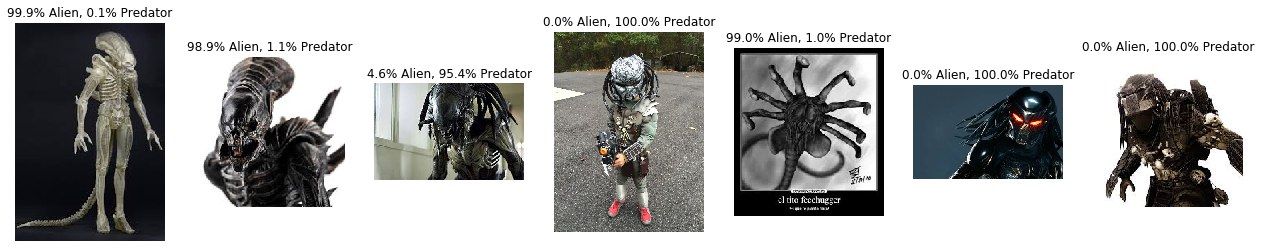

In [69]:
fig, axs = plt.subplots(1, len(img_list), figsize=(22, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.1f}% Alien, {:.1f}% Predator".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)